# Prediction of Weight on the basis of Height
This project is a part of a Machine Learning.
The dataset for this project has been collected from @Kaggle. The weight-height data has 10000 rows and 3 columns.
Here we're gonna build a statistical model on simple linear regression using the heights of each and every person to predict what will be their weight accordingly.


In [2]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Pretty display for notebooks
import matplotlib.pyplot as plt

In [3]:
#load the dataset
data = pd.read_csv("weight-height.csv")

#here we'll be dropping the gender column of the dataframe we've created as it is irrelevant
data1 = data.drop('Gender', axis=1)

#displaying top 5 rows of the new dataframe
data1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
# View descriptive statistics
data1.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# Independent and Dependent Variables
In this project, I refer Height as Independent variable and Weight as Dependent variable.

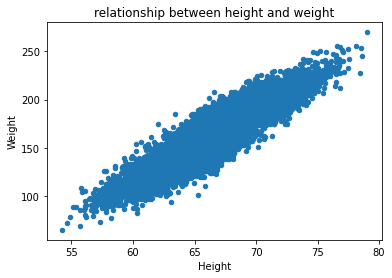

In [5]:
#Visual exploratory data analysis(scatterplot to show the relationship between Height and Weight)
data1.plot(kind='scatter', x='Height', y='Weight', title='relationship between height and weight')
plt.show()

In [6]:
#change to dataframe variables
Height = pd.DataFrame(data1['Height'])
Weight = pd.DataFrame(data1['Weight'])

# Checking dimensions of Height and Weight
We need to check the dimensions of Height and Weight to make sure they are in right format.
It is an important precursor to model building.

In [7]:
print(Height.shape)
print(Weight.shape)

(10000, 1)
(10000, 1)


In [8]:
Height = Height.values.reshape(-1, 1)
Weight = Weight.values.reshape(-1, 1)

# Train test split
split the dataset into two sets- train set and test set. The model learn the relationships from the training data and predict on test data.

In [27]:
# Split X and y into training and test data sets
Height_train,Height_test,Weight_train,Weight_test = train_test_split(Height, Weight, test_size=0.2, random_state=0)

In [28]:
Height_test

array([[64.72387669],
       [67.27217066],
       [74.52097209],
       ...,
       [66.07110689],
       [65.64153589],
       [64.21086615]])

In [29]:
Height_test = Height_test.reshape(-1, 1)
Height_train = Height_train.reshape(-1, 1)
Weight_test = Weight_test.reshape(-1, 1)
Weight_train = Weight_train.reshape(-1, 1)

# fitting regression model
In this step, the model learned the relationships between the training data (X_train, y_train).

Now the model is ready to make predictions on the test data (Height_test). Hence, I predict on the test data using the predict method.

In [12]:
#building regression model
lm = linear_model.LinearRegression()

## Train the model using training data sets
model = lm.fit(Height_train, Weight_train)

# Predict on the test data
Weight_pred=lm.predict(Height_test)

# Model slope and intercept

In [13]:
model.coef_

array([[7.70936331]])

In [14]:
model.intercept_

array([-350.19040286])

# predictions
I have predicted the Weight values on first five 5 Height values. The code is written as follows:-

In [15]:
lm.predict(Height)[0:5]

array([[219.12308049],
       [180.0742844 ],
       [221.15132435],
       [202.80977004],
       [188.55375   ]])

In [30]:
#an individual prediction using the linear regression model
height_test = pd.DataFrame([64.72387669])
Weight_predict = model.predict(height_test)
Weight_predict

array([[148.7894772]])

# R-Squared value
It is a metric to evaluate performance of a regression model. It is also called coefficient of determination. It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance that is explained by the model.
The higher the R squared value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can't be negative.

In [32]:
#evaluate the model by checking its accuracy percentage
from sklearn.metrics import r2_score
a = r2_score(Weight_test, Weight_pred)
a

0.8581952493935258

# Regression line
Now we're gonna draw a regression line to compare it with the predicted values.

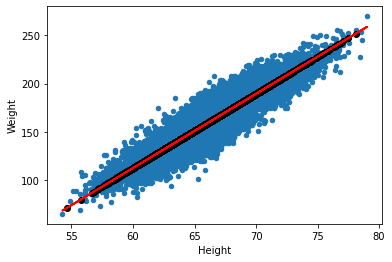

In [33]:
#visualize the result
data1.plot(kind='scatter', x='Height', y='Weight')

#plotting the regression line
plt.plot(Height, model.predict(Height), color='red', linewidth=2)

#plotting the regression line with the predicted values
plt.scatter(Height_test, Weight_pred, color='black')
plt.show()

# Checking for Overfitting and Underfitting
I calculate training set score as 0.8544. Similarly, I calculate test set score as 0.8581. As you can see from the table, the scores are very close which indicates that we avoided over-fitting or underfitting. I should mention that this is a good indication that we have not over-fit or undet-fit the model. So this is a good-fit model......

In [37]:
#training set score
print(lm.score(Height_train,Weight_train))

#test set score
print(lm.score(Height_test,Weight_test))

0.8544074009765417
0.8581952493935258


# Conclusion
This finishes our project. Hope it helped you a little !!

Thank you!❤